importing the dataset:-

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")


In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


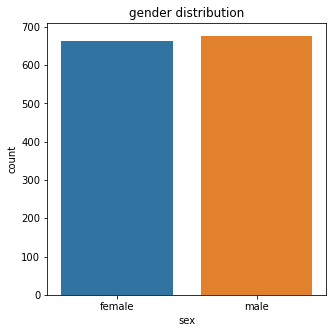

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('gender distribution')
plt.show()

we can observed that male is more

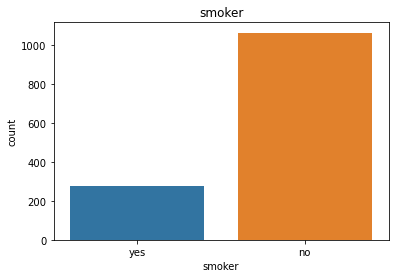

In [48]:
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

we observed that non smoker is more

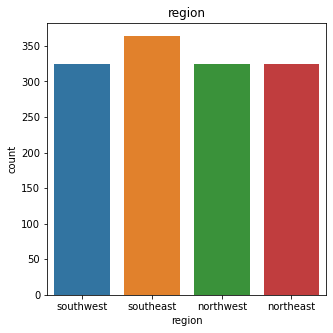

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

southeast have more madical cost

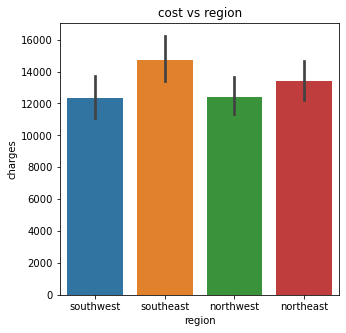

In [52]:
# bar plot
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges' ,data=df)
plt.title('cost vs region')
plt.show()

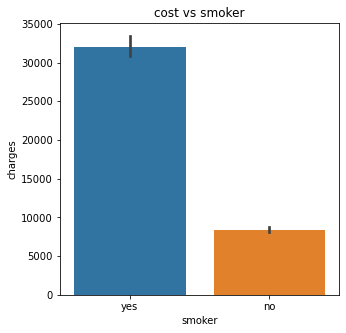

In [53]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges' ,data=df)
plt.title('cost vs smoker')
plt.show()

In [1]:
fig.suptitle('visualizing categorical columns')
snfig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
s.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])

NameError: name 'fig' is not defined

In [55]:
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'no':0,'yes':1}.get)
df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


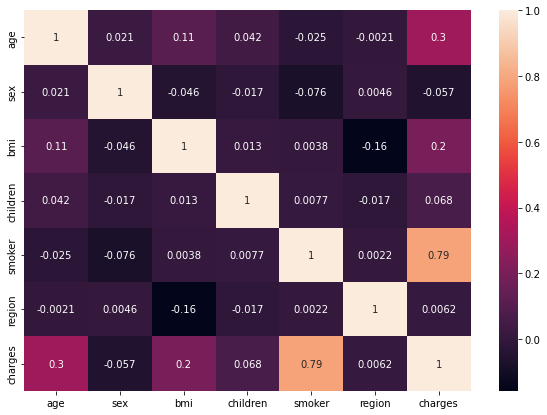

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df.shape

(1338, 7)

Checking null values in the dataframe

In [8]:
#np.nan ,none,NaN,others

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

since there are no null values than we can proceed

checking the datatypes of the columns

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we can observe that the "charges" has continuous data but it is an object type.lets us handle this columns

In [12]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [13]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df["charges"].nunique()

1337

In [15]:
df.shape[0]

1338

In [16]:
df.loc[df['charges']== " "]

,age,sex,bmi,children,smoker,region,charges


After some observations,

In [17]:
df["charges"]=df["charges"].replace(" ",np.nan)

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Converting the column type from object to float

In [19]:
df["charges"]=df["charges"].astype(float)

In [20]:
df.charges.dtype

dtype('float64')

Now we can see charges columns has some space values which is replaced by nan values.now we will handle the nan values.
handling the nan values and replacing it with the mean of the column as the column continuous in nature.

In [21]:
np.mean(df["charges"])

13270.422265141257

In [22]:
df.iloc[1337,:]

age                 61
sex             female
bmi              29.07
children             0
smoker             yes
region       northwest
charges     29141.3603
Name: 1337, dtype: object

In [23]:
df["charges"]=df["charges"].fillna(np.mean(df["charges"]))

In [24]:
df.iloc[1334,:]

age                18
sex            female
bmi             31.92
children            0
smoker             no
region      northeast
charges     2205.9808
Name: 1334, dtype: object

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Making DataFrame for the nominal data

In [27]:
df_visualization_nominal=df[['age','sex','bmi','children','smoker','region','charges']].copy()

In [28]:
df_visualization_nominal.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# visualization of the data

for the nomial categorical data we will use countplot as it will give the frequency of the classes of the columns:

In [29]:
import seaborn as sns

no     1064
yes     274
Name: smoker, dtype: int64


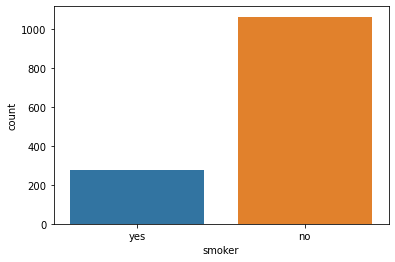

In [30]:
ax=sns.countplot(x="smoker",data=df_visualization_nominal)
print(df_visualization_nominal["smoker"].value_counts())

from the above observation the total no of smoker is 274 and total number of not smoker is 1064.

male      676
female    662
Name: sex, dtype: int64


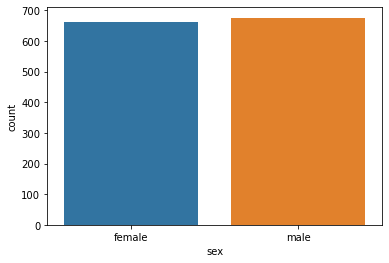

In [31]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

from the above observation the total no of female is 662 and total number of male is 676.

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


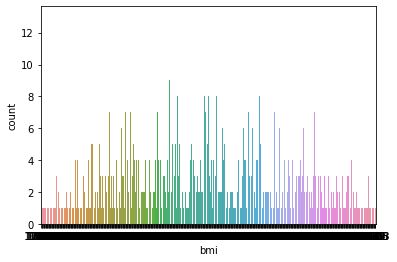

In [32]:
ax=sns.countplot(x="bmi",data=df_visualization_nominal)
print(df_visualization_nominal["bmi"].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


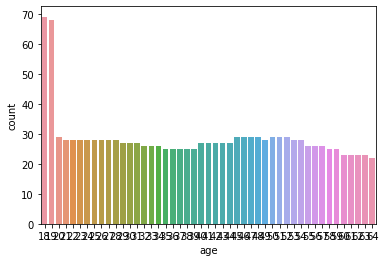

In [33]:
ax=sns.countplot(x="age",data=df_visualization_nominal)
print(df_visualization_nominal["age"].value_counts())

from the above observation the no of person 18 year old is 69 and 19 year old 68 as showon

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


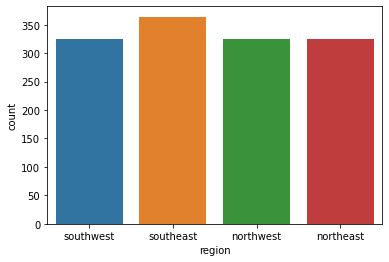

In [34]:
ax=sns.countplot(x="region",data=df_visualization_nominal)
print(df_visualization_nominal["region"].value_counts())

from the above observation the no of people of southest 364,southwest 325,northwest 325 and northest is 324

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


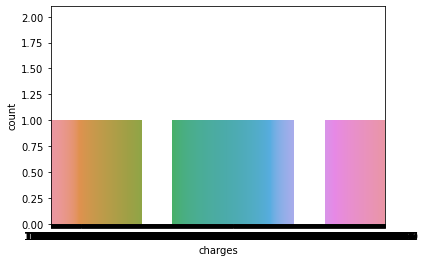

In [35]:
ax=sns.countplot(x="charges",data=df_visualization_nominal)
print(df_visualization_nominal["charges"].value_counts())

<AxesSubplot:xlabel='region', ylabel='charges'>

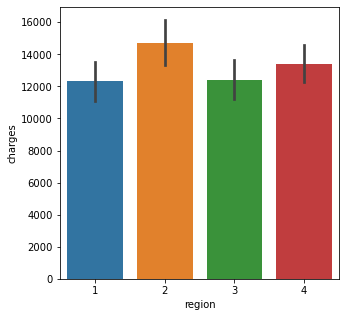

In [63]:
#bar plot
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)


it is seen that high medical charge in southeast region

<AxesSubplot:xlabel='smoker', ylabel='charges'>

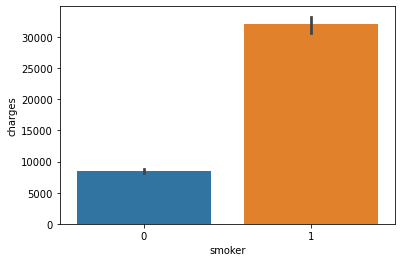

In [64]:
sns.barplot(x='smoker',y='charges',data=df)

medical cost for smoker is high

<AxesSubplot:xlabel='sex', ylabel='charges'>

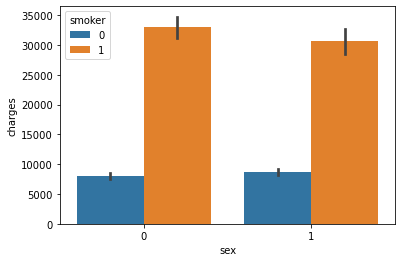

In [65]:
sns.barplot(x='sex',y='charges',hue='smoker', data=df)

male smoker have very high medical insurance cost

<AxesSubplot:xlabel='region', ylabel='charges'>

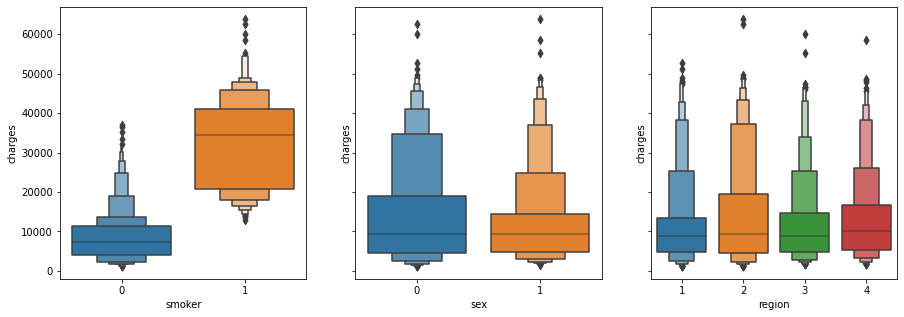

In [66]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
sns.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])


# making dataframe of the ordinal data

In [67]:
df_visualization_ordinal=df[["smoker","bmi",]].copy()

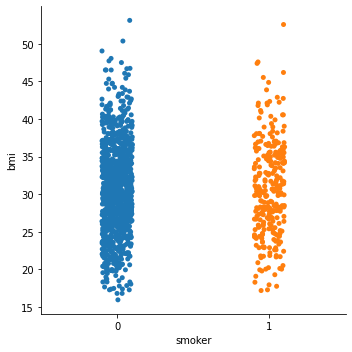

In [68]:
sns.catplot(x="smoker",y="bmi",data=df)

# checking the distrubution of the continuous value of the float type columns

In [69]:
df_visualization_continuous=df[["bmi","charges"]].copy()

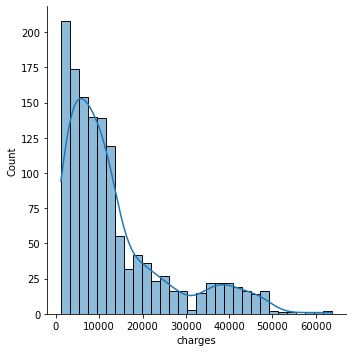

In [70]:
import seaborn as sns
sns.displot(df_visualization_continuous["charges"],kde=True)

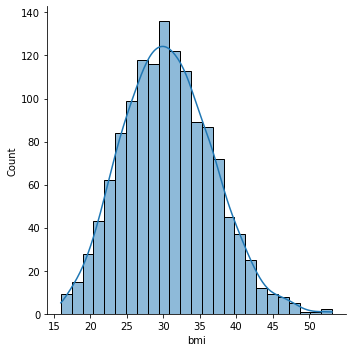

In [71]:
sns.displot(df_visualization_continuous["bmi"],kde=True)

normal distrubution data seen here

# Encoding of dataframe

In [72]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder

In [73]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [74]:
 df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


# Describe the dataset:

In [75]:
#only continuous column
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# correlation of the columns with the target columns:

In [76]:
df.corr()["charges"].sort_values()

sex        -0.057292
region      0.006208
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

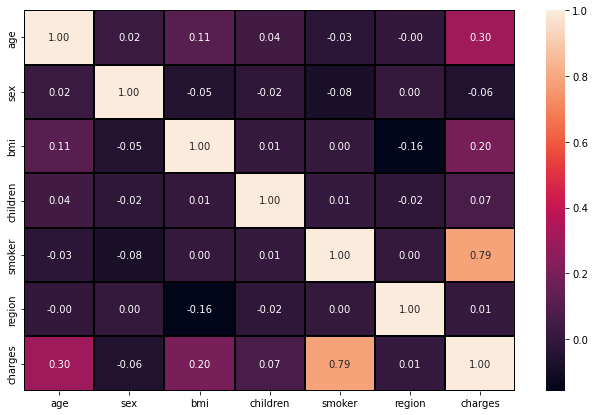

In [77]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

checking the columns which are positively and negative correlated with the target columns

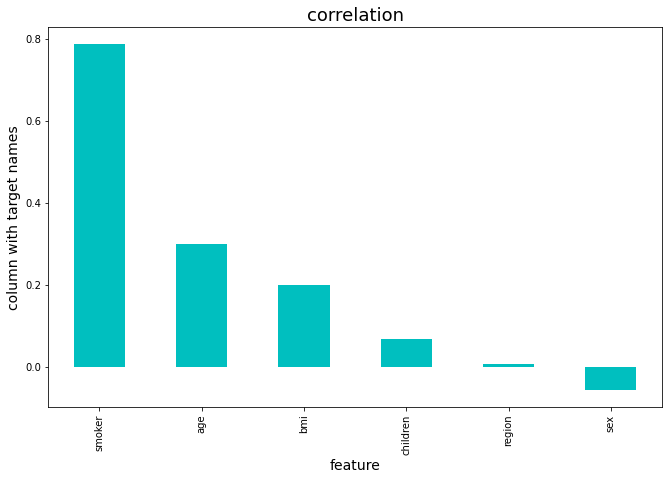

In [78]:
plt.figure(figsize=(11,7))
df.corr()["charges"].sort_values(ascending=False).drop(["charges"]).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [79]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.038101
charges     1.515880
dtype: float64

outliers check

In [80]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

checking the outlier on the int and float type columns

<AxesSubplot:>

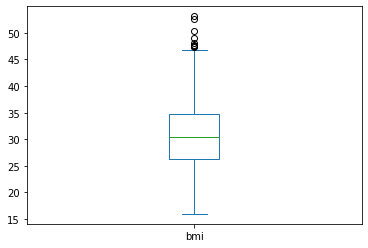

In [81]:
df["bmi"].plot.box()

<AxesSubplot:>

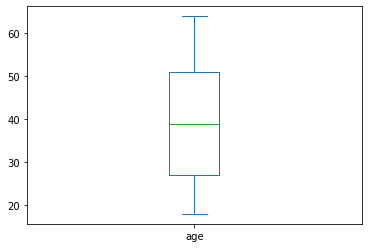

In [82]:
df["age"].plot.box()

<AxesSubplot:>

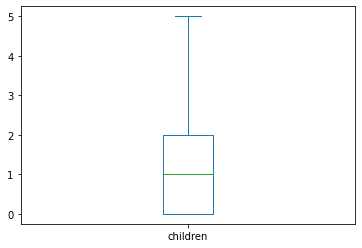

In [83]:
df["children"].plot.box()

<AxesSubplot:>

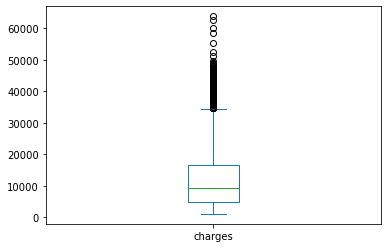

In [84]:
df["charges"].plot.box()

In [85]:
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'no':0,'yes':1}.get)
df['region']=df['region'].apply({'southwest':1,'southest':2,'northwest':3,'northest':4}.get)



In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,None,27.900,0,None,None,16884.92400
1,18,None,33.770,1,None,None,1725.55230
2,28,None,33.000,3,None,None,4449.46200
3,33,None,22.705,0,None,None,21984.47061
4,32,None,28.880,0,None,None,3866.85520


# considering the outlier removel

In [87]:
df.shape

(1338, 7)

In [88]:
features=df.drop('charges',axis=1)
target=df['charges']

# Scaling the data using min-max scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
x=df.drop(['charges','sex'],axis=1)
y=df.charges

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


x_train shape: (936, 5)
x_test shape: (402, 5)
y_train shape: (936,)
y_test shape: (402,)


# LinearRegression

In [93]:
linreg=LinearRegression()

In [98]:
linreg.fit(x_train,y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [99]:
pred=linreg.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [95]:
from sklearn.metrics import r2_score

In [96]:
print('R2 score: ',r2_score(y_test,pred))

NameError: name 'pred' is not defined

In [97]:
plt.scatter(y_test,pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.show()

NameError: name 'pred' is not defined

In [100]:
data={'age':50,'bmi':25,'children':2,'smoker':0,'region':2}
index=[0]
cust_df=pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [101]:
cost_pred=linreg.predict(cust_df)
print('the medical insurance cost of the new customer is ',cost_pred)

AttributeError: 'LinearRegression' object has no attribute 'coef_'